# Project Research Questions:

1. Which countries had the lowest happiness score? highest happiness score? 

2. What are the outliers for the measures of SWB: social support, healthy life expectancy, generosity, freedom to make life choices, GDP per capita, and perception of corruption? How do they compare?

3. Which of the measures of SWB (i.e., social support, healthy life expectancy, generosity, freedom to make life choices, GDP per capita, and perception of corruption) are most highly correlated with a higher happiness score?

4. Which of these measures are most likely to influence the happiness score? 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import time

#Import and read csvs - please note that the csv files from kaggle were titled using the year the report was published.
#The date on the df title reflects the year the actual data applies to (i.e. the happiness2020.csv actually contains 2019 data)
file2018 = "happiness2018.csv"
file2019 = "happiness2019.csv"
file2020 = "happiness2020.csv"

hap2017_df = pd.read_csv(file2018)
hap2018_df = pd.read_csv(file2019)
hap2019_df = pd.read_csv(file2020)

In [2]:
#renaming "Country or region" in original 2018 file to "Country" for ease of merging
hap2017_df = hap2017_df.rename(columns={"Country or region": "Country"})

#drop unecessary columns:
clean_2017_df = hap2017_df.drop(columns = ["Overall rank"])
clean_2017_df

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [3]:
#renaming "Country or region" in original 2019 file to "Country" for ease of merging
hap2018_df = hap2018_df.rename(columns={"Country or region": "Country"})

#drop unecessary columns:
clean_2018_df = hap2018_df.drop(columns = ["Overall rank"])


#add year column to hap2019_df
#hap2019_df['Year'] = "2017"
#hap2019_df['Year'] = pd.to_numeric(hap2019_df['Year'])


In [4]:
#drop columns we dont need in 2020 data and rename "Country name" column to "Country" for ease of merging
hap2019_df = hap2019_df.rename(columns={"Country name": "Country"})

#drop unecessary columns:
clean_2019_df = hap2019_df.drop(columns = ["Standard error of ladder score", 
                                           "Logged GDP per capita", 
                                           "upperwhisker", 
                                           "lowerwhisker", 
                                           "Ladder score in Dystopia", 
                                           "Dystopia + residual", 
                                           "Social support", 
                                           "Healthy life expectancy", 
                                           "Freedom to make life choices", 
                                           "Generosity", 
                                           "Perceptions of corruption"])


#rename columns:
clean_2019_df = clean_2019_df.rename(columns=
                             {"Explained by: Log GDP per capita":"GDP per capita 2019",
                              "Explained by: Social support":"Social support 2019",
                              "Explained by: Healthy life expectancy": "Healthy life expectancy 2019",
                              "Explained by: Freedom to make life choices": "Freedom to make life choices 2019",
                              "Explained by: Generosity":"Generosity 2019", 
                              "Explained by: Perceptions of corruption": "Perceptions of corruption 2019",
                              "Ladder score": "Score 2019"
                              })


clean_2019_df


,Country,Regional indicator,Score 2019,GDP per capita 2019,Social support 2019,Healthy life expectancy 2019,Freedom to make life choices 2019,Generosity 2019,Perceptions of corruption 2019
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,Sub-Saharan Africa,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,Sub-Saharan Africa,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


In [5]:
#ran counts for all dataframes to determine if there was any missing info. none were found:
#clean_2017_df.count()
#clean_2018_df.count()
#clean_2019_df.count()


In [6]:
#analyzed data types for each column in each dataframe. All items are floats except for regional indicator and country name, which makes sense.
#clean_2017_df.dtypes
#clean_2018_df.dtypes
clean_2019_df.dtypes

Country                               object
Regional indicator                    object
Score 2019                           float64
GDP per capita 2019                  float64
Social support 2019                  float64
Healthy life expectancy 2019         float64
Freedom to make life choices 2019    float64
Generosity 2019                      float64
Perceptions of corruption 2019       float64
dtype: object

In [112]:
#no further cleaning of our 2018,2019 and 2020 data is needed. Now we can merge the files. 
merge1_df = pd.merge(clean_2017_df, clean_2018_df, on = "Country", how = "inner", suffixes=(" 2017", " 2018"))
merge1_df.head(10)

,Country,Score 2017,GDP per capita 2017,Social support 2017,Healthy life expectancy 2017,Freedom to make life choices 2017,Generosity 2017,Perceptions of corruption 2017,Score 2018,GDP per capita 2018,Social support 2018,Healthy life expectancy 2018,Freedom to make life choices 2018,Generosity 2018,Perceptions of corruption 2018
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.554,1.488,1.582,1.028,0.603,0.271,0.341
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,7.480,1.452,1.526,1.052,0.572,0.263,0.343
5,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291,7.278,1.365,1.505,1.039,0.584,0.285,0.308
7,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383,7.343,1.387,1.487,1.009,0.574,0.267,0.373
9,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302,7.228,1.372,1.548,1.036,0.557,0.332,0.290


In [8]:
#merge 2019 data into 2017_2018 df:
merge2_df = pd.merge(merge1_df, clean_2019_df, on = "Country", how = "inner")
merge2_df

,Country,Score 2017,GDP per capita 2017,Social support 2017,Healthy life expectancy 2017,Freedom to make life choices 2017,Generosity 2017,Perceptions of corruption 2017,Score 2018,GDP per capita 2018,...,Generosity 2018,Perceptions of corruption 2018,Regional indicator,Score 2019,GDP per capita 2019,Social support 2019,Healthy life expectancy 2019,Freedom to make life choices 2019,Generosity 2019,Perceptions of corruption 2019
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.769,1.340,...,0.153,0.393,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.554,1.488,...,0.271,0.341,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,7.600,1.383,...,0.252,0.410,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.494,1.380,...,0.354,0.118,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,7.480,1.452,...,0.263,0.343,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,3.380,0.287,...,0.108,0.077,Middle East and North Africa,3.5274,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352
140,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,3.231,0.476,...,0.276,0.147,Sub-Saharan Africa,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
141,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2.853,0.306,...,0.202,0.091,Sub-Saharan Africa,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157
142,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,3.083,0.026,...,0.235,0.035,Sub-Saharan Africa,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


In [9]:
merge2_df.count()

#we have decided to keep the 2017 perceptions of corruption cell blank for United Arab Emirates. Further action TBD during analysis.

Country                              144
Score 2017                           144
GDP per capita 2017                  144
Social support 2017                  144
Healthy life expectancy 2017         144
Freedom to make life choices 2017    144
Generosity 2017                      144
Perceptions of corruption 2017       143
Score 2018                           144
GDP per capita 2018                  144
Social support 2018                  144
Healthy life expectancy 2018         144
Freedom to make life choices 2018    144
Generosity 2018                      144
Perceptions of corruption 2018       144
Regional indicator                   144
Score 2019                           144
GDP per capita 2019                  144
Social support 2019                  144
Healthy life expectancy 2019         144
Freedom to make life choices 2019    144
Generosity 2019                      144
Perceptions of corruption 2019       144
dtype: int64

In [10]:
#final dataframe complete
final_df = merge2_df.copy()

#move regional indicator column next to country
cols_to_order = ['Country', 'Regional indicator']
new_columns = cols_to_order + (final_df.columns.drop(cols_to_order).tolist())
final_df = final_df[new_columns]

final_df #matches merge2_df with columns reordered

,Country,Regional indicator,Score 2017,GDP per capita 2017,Social support 2017,Healthy life expectancy 2017,Freedom to make life choices 2017,Generosity 2017,Perceptions of corruption 2017,Score 2018,...,Freedom to make life choices 2018,Generosity 2018,Perceptions of corruption 2018,Score 2019,GDP per capita 2019,Social support 2019,Healthy life expectancy 2019,Freedom to make life choices 2019,Generosity 2019,Perceptions of corruption 2019
0,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.769,...,0.596,0.153,0.393,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340,7.554,...,0.603,0.271,0.341,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
2,Denmark,Western Europe,7.555,1.351,1.590,0.868,0.683,0.284,0.408,7.600,...,0.592,0.252,0.410,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
3,Iceland,Western Europe,7.495,1.343,1.644,0.914,0.677,0.353,0.138,7.494,...,0.591,0.354,0.118,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Switzerland,Western Europe,7.487,1.420,1.549,0.927,0.660,0.256,0.357,7.480,...,0.572,0.263,0.343,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Yemen,Middle East and North Africa,3.355,0.442,1.073,0.343,0.244,0.083,0.064,3.380,...,0.143,0.108,0.077,3.5274,0.392702,1.177477,0.415000,0.243721,0.094689,0.087352
140,Tanzania,Sub-Saharan Africa,3.303,0.455,0.991,0.381,0.481,0.270,0.097,3.231,...,0.417,0.276,0.147,3.4762,0.457163,0.872675,0.442678,0.509343,0.271541,0.203881
141,South Sudan,Sub-Saharan Africa,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2.853,...,0.010,0.202,0.091,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157
142,Central African Republic,Sub-Saharan Africa,3.083,0.024,0.000,0.010,0.305,0.218,0.038,3.083,...,0.225,0.235,0.035,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265


In [11]:
#export dataframe to csv
#final_df.to_csv(r'Final_DF.csv')

In [12]:
#create new df with averages
#group by country
#agg

#groupby_country_df = final_df.groupby(['Country']).mean()
#groupby_country_df

score_avg = final_df[['Score 2017','Score 2018','Score 2019']].mean(axis=1)
gdp_avg = final_df[['GDP per capita 2017', 'GDP per capita 2018','GDP per capita 2017']].mean(axis=1)
social_support_avg = final_df[['Social support 2017','Social support 2018','Social support 2019']].mean(axis=1)
life_exp_avg = final_df[['Healthy life expectancy 2017','Healthy life expectancy 2018','Healthy life expectancy 2019']].mean(axis=1)
generosity_avg = final_df[['Generosity 2017','Generosity 2018','Generosity 2019']].mean(axis=1)
freedom_avg = final_df[['Freedom to make life choices 2017','Freedom to make life choices 2018','Freedom to make life choices 2019']].mean(axis=1)
corruption_avg = final_df[['Perceptions of corruption 2017','Perceptions of corruption 2018','Perceptions of corruption 2019']].mean(axis=1)

average_df = pd.DataFrame({'Country': final_df['Country'],
                           'Region': final_df['Regional indicator'],
                           'Score Average': score_avg, 
                           'GDP per Capita Average': gdp_avg,
                           'Social Support Average': social_support_avg,
                           'Healthy Life Expectancy Average': life_exp_avg,
                           'Generosity Average': generosity_avg,
                           'Freedom to Make Life Choices Average': freedom_avg,
                           'Perceptions of Corruption Average': corruption_avg                         
                           })

average_df.round(2)
      

,Country,Region,Score Average,GDP per Capita Average,Social Support Average,Healthy Life Expectancy Average,Generosity Average,Freedom to Make Life Choices Average,Perceptions of Corruption Average
0,Finland,Western Europe,7.74,1.32,1.56,0.94,0.17,0.65,0.42
1,Norway,Western Europe,7.55,1.47,1.55,0.97,0.28,0.65,0.37
2,Denmark,Western Europe,7.60,1.36,1.56,0.95,0.26,0.65,0.44
3,Iceland,Western Europe,7.50,1.36,1.61,0.98,0.36,0.64,0.13
4,Switzerland,Western Europe,7.51,1.43,1.52,1.01,0.26,0.62,0.37
...,...,...,...,...,...,...,...,...,...
139,Yemen,Middle East and North Africa,3.42,0.39,1.14,0.41,0.10,0.21,0.08
140,Tanzania,Sub-Saharan Africa,3.34,0.46,0.92,0.44,0.27,0.47,0.15
141,South Sudan,Sub-Saharan Africa,2.97,0.33,0.58,0.23,0.21,0.06,0.10
142,Central African Republic,Sub-Saharan Africa,3.21,0.02,0.00,0.04,0.24,0.27,0.03


In [13]:
#export dataframe to csv
#average_df.to_csv(r'Average_DF.csv')

In [118]:
averagesorted_df = average_df.sort_values(['Score Average'], ascending=False).groupby('Country').head()
averagesorted_df.head(10)

,Country,Region,Score Average,GDP per Capita Average,Social Support Average,Healthy Life Expectancy Average,Generosity Average,Freedom to Make Life Choices Average,Perceptions of Corruption Average
0,Finland,Western Europe,7.736567,1.316667,1.559509,0.940424,0.171557,0.646439,0.421286
2,Denmark,Western Europe,7.600200,1.361667,1.555483,0.947778,0.259598,0.646680,0.437753
1,Norway,Western Europe,7.545333,1.466667,1.553058,0.965691,0.281662,0.653067,0.371700
4,Switzerland,Western Europe,7.508967,1.430667,1.515801,1.006511,0.262685,0.620318,0.369315
3,Iceland,Western Europe,7.497833,1.355333,1.605189,0.980281,0.356443,0.643327,0.133514
5,Netherlands,Western Europe,7.459300,1.372667,1.491215,0.950892,0.330439,0.602875,0.320523
8,Sweden,Western Europe,7.336833,1.365667,1.473783,0.969490,0.274943,0.627766,0.399355
7,New Zealand,North America and ANZ,7.310200,1.279667,1.548406,0.970046,0.340242,0.633597,0.410089
6,Canada,North America and ANZ,7.279367,1.341667,1.490797,0.985834,0.295843,0.627009,0.316901
9,Australia,North America and ANZ,7.240933,1.350667,1.532715,0.989536,0.339325,0.608626,0.309332


In [121]:
#Which countries had the lowest happiness score? highest happiness score?
#top10 = averagesorted_df.head(10)
last10 = averagesorted_df.tail(10)
last10

,Country,Region,Score Average,GDP per Capita Average,Social Support Average,Healthy Life Expectancy Average,Generosity Average,Freedom to Make Life Choices Average,Perceptions of Corruption Average
132,Zimbabwe,Sub-Saharan Africa,3.551400,0.360000,1.085278,0.352013,0.144783,0.381468,0.089643
134,Botswana,Sub-Saharan Africa,3.518967,1.025000,1.134898,0.483034,0.033469,0.507030,0.097929
135,Malawi,Sub-Saharan Africa,3.511667,0.187667,0.543789,0.415721,0.213728,0.487130,0.100211
143,Burundi,Sub-Saharan Africa,3.485100,0.076000,0.492525,0.273404,0.170801,0.186800,0.156062
139,Yemen,Middle East and North Africa,3.420800,0.390333,1.137826,0.407000,0.095230,0.210240,0.076117
138,Rwanda,Sub-Saharan Africa,3.351433,0.341000,0.709959,0.528794,0.217568,0.598363,0.446847
140,Tanzania,Sub-Saharan Africa,3.336733,0.462000,0.916225,0.440893,0.272514,0.469114,0.149294
142,Central African Republic,Sub-Saharan Africa,3.213967,0.024667,0.000000,0.038333,0.235504,0.274271,0.033755
133,Afghanistan,South Asia,3.133967,0.338000,0.470145,0.294017,0.161412,0.028333,0.020742
141,South Sudan,Sub-Saharan Africa,2.974533,0.326667,0.578760,0.226936,0.211978,0.062536,0.102719


# Correlations:
Which of the measures of SWB (i.e., social support, healthy life expectancy, generosity, freedom to make life choices, GDP per capita, and perception of corruption) are most highly correlated with a higher happiness score?

# Scatterplots
Build out my function for the scatterplots

In [102]:
# Build out a function for linear regression for my scatterplots. 
def happinessfunction(x_values, y_values,title,xlabel,ylabel,i,l):
    #Stats will call from my variable above and then look for what ever argument I establish in ()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plot and format
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"red")
    plt.annotate(line_eq,(i,l), fontsize=10,color="red")
    print(f'The correlation coefficient {(rvalue).round(2)}')
    print(f'The r_squared value is: {(rvalue**2).round(2)}')
    print(f'The slope is: {(slope).round(2)} and intercept is: {(intercept).round(2)}')
    print(f'The p value is {(pvalue).round(4)}')
    #label
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.savefig(f"images/{title}linreg.png")
    plt.show()

Scatterplot: Social Support and Happiness Score

The correlation coefficient 0.77
The r_squared value is: 0.6
The slope is: 0.2 and intercept is: 0.09
The p value is 0.0


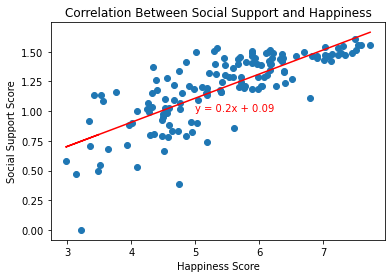

In [103]:
#Plug in my function and arguments, repeat these steps below: 
happinessfunction(average_df["Score Average"],average_df['Social Support Average'],\
         title="Correlation Between Social Support and Happiness",xlabel = "Happiness Score",\
                  ylabel = "Social Support Score", i=5,l=1)

Scatterplot: Healthy life expectancy and Happiness Score

The correlation coefficient 0.8
The r_squared value is: 0.64
The slope is: 0.17 and intercept is: -0.27
The p value is 0.0


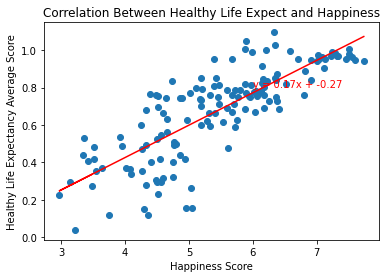

In [104]:
happinessfunction(average_df["Score Average"],average_df['Healthy Life Expectancy Average'],\
         title="Correlation Between Healthy Life Expect and Happiness",xlabel = "Happiness Score",\
                  ylabel = "Healthy Life Expectancy Average Score", i=6,l=.8)

Scatterplot: Generosity and Happiness Score

The correlation coefficient 0.11
The r_squared value is: 0.01
The slope is: 0.01 and intercept is: 0.13
The p value is 0.1778


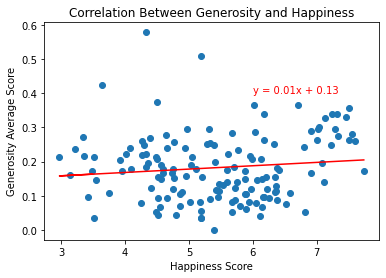

In [105]:
happinessfunction(average_df["Score Average"],average_df['Generosity Average'],\
         title="Correlation Between Generosity and Happiness",xlabel = "Happiness Score",\
                  ylabel = "Generosity Average Score", i=6,l=.4)

Scatterplot: Freedom in choices and Happiness

The correlation coefficient 0.57
The r_squared value is: 0.32
The slope is: 0.07 and intercept is: 0.04
The p value is 0.0


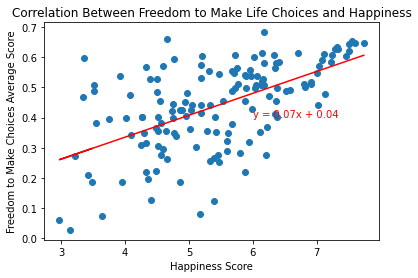

In [107]:
happinessfunction(average_df["Score Average"],average_df['Freedom to Make Life Choices Average'],\
         title="Correlation Between Freedom to Make Life Choices and Happiness",xlabel = "Happiness Score",\
                  ylabel = "Freedom to Make Choices Average Score", i=6,l=.4)

Scatterplot: GDP and Happiness

The correlation coefficient 0.81
The r_squared value is: 0.65
The slope is: 0.28 and intercept is: -0.63
The p value is 0.0


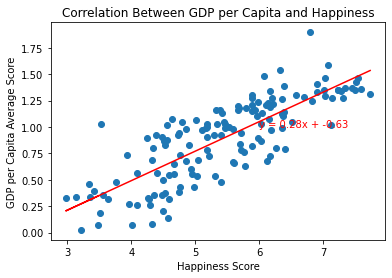

In [108]:
happinessfunction(average_df["Score Average"],average_df['GDP per Capita Average'],\
         title="Correlation Between GDP per Capita and Happiness",xlabel = "Happiness Score",\
                  ylabel = "GDP per Capita Average Score", i=6,l=1.0)

Scatterplot: Perception of Corruption and Happiness

The correlation coefficient 0.44
The r_squared value is: 0.19
The slope is: 0.04 and intercept is: -0.1
The p value is 0.0


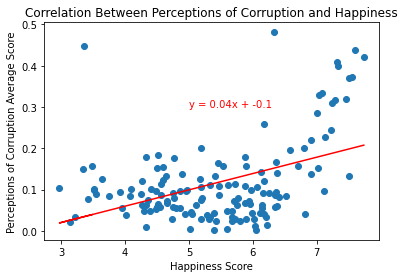

In [109]:
happinessfunction(average_df["Score Average"],average_df['Perceptions of Corruption Average'],\
         title="Correlation Between Perceptions of Corruption and Happiness",xlabel = "Happiness Score",\
                  ylabel = "Perceptions of Corruption Average Score", i=5,l=.3)

The correlation coefficient 0.35
The r_squared value is: 0.12
The slope is: 0.09 and intercept is: 0.03
The p value is 0.0


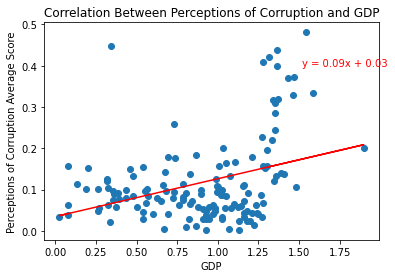

In [110]:
happinessfunction(average_df["GDP per Capita Average"],average_df['Perceptions of Corruption Average'],\
         title="Correlation Between Perceptions of Corruption and GDP",xlabel = "GDP",\
                  ylabel = "Perceptions of Corruption Average Score", i=1.52,l=.4)